In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [2]:
# Loading train and test data

train1 = pd.read_csv("../Dataset/train.csv") 
test1 = pd.read_csv("../Dataset/test.csv") 

In [3]:
# Checking number of rows and columns

print(train1.shape)
print(test1.shape)

(76020, 371)
(75818, 370)


In [4]:
# Analysing some basic Statistics

train1.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
# Checking NAN values

print(train1.isnull().values.sum())
print(test1.isnull().values.sum())

0
0


In [6]:
#Checking data balance according to target variable

Positive = train1[train1["TARGET"] == 1]
print(Positive.shape)
Negative = train1[train1["TARGET"] == 0]
print(Negative.shape)

(3008, 371)
(73012, 371)


In [7]:
# Balancing data

train2 = train1[train1["TARGET"] == 0].sample(3008).append(train1[train1["TARGET"] == 1])
Positive = train2[train2["TARGET"] == 1]
print(Positive.shape)
Negative = train2[train2["TARGET"] == 0]
print(Negative.shape)

(3008, 371)
(3008, 371)


In [8]:
# Removing variables with high correlation between each other, i.e they represent the same information 

train_corr = train2.corr(method = 'pearson')
train_corr = np.array(train_corr.fillna(0))
aux = []

for i in range(len(train2.columns)-1):
    for j in range(i+1, len(train_corr)-1):
            if abs(train_corr[i][j]) > 0.95 and j not in aux:
                aux.append(j)
print("Number of removed columns: " + str(len(aux)))
train3 = train2.drop(train2.columns[aux], axis = 1)
test3 = test1.drop(train2.columns[aux], axis = 1)
train3.describe()

Number of removed columns: 118


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var29_hace3,saldo_medio_var33_hace3,saldo_medio_var44_hace2,var38,TARGET
count,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,...,6016.0,6016.0,6016.0,6016.000000,6016.0,6016.0,6016.0,6016.000000,6.016000e+03,6016.000000
mean,75561.144947,-1493.635140,36.245013,69.606667,77.617031,119.001562,3.016616,1.655585,2.079455,2.870550,...,0.0,0.0,0.0,1.592603,0.0,0.0,0.0,16.837151,1.079487e+05,0.500000
std,43816.780609,38652.620718,12.828758,1077.208404,389.941648,538.700951,72.868833,44.662790,58.248880,64.256392,...,0.0,0.0,0.0,76.007210,0.0,0.0,0.0,984.439436,1.016869e+05,0.500042
min,68.000000,-999999.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.113663e+04,0.000000
25%,37337.750000,2.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,6.084437e+04,0.000000
50%,74888.500000,2.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,9.706701e+04,0.500000
75%,113684.750000,2.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.173110e+05,1.000000
max,151811.000000,216.000000,102.000000,51003.000000,12888.030000,13183.230000,3639.870000,1800.000000,3000.000000,2986.980000,...,0.0,0.0,0.0,4854.840000,0.0,0.0,0.0,73934.970000,3.988595e+06,1.000000


In [9]:
# Removing columns with correlation lower than 0.18 to the target variable

train_corr = train3.corr(method = 'pearson')["TARGET"]
train_corr = train_corr.fillna(0)
train4 = train3
test4 = test3

i = len(train_corr) - 2

while i >= 0:
    if abs(train_corr[i]) < 0.18:
        train4 = train4.drop(train_corr.index[i],1)
        test4 = test4.drop(train_corr.index[i],1)
    i -= 1
    
train4.describe()

,var15,ind_var5,ind_var30,num_var4,num_var30,num_var42,var36,num_meses_var5_ult3,TARGET
count,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000
mean,36.245013,0.517453,0.581117,0.917055,1.868517,1.755319,51.825632,1.532247,0.500000
std,12.828758,0.499737,0.493417,0.987672,1.707788,1.600698,48.454241,1.390129,0.500042
min,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,33.000000,1.000000,1.000000,1.000000,3.000000,3.000000,99.000000,2.000000,0.500000
75%,44.000000,1.000000,1.000000,1.000000,3.000000,3.000000,99.000000,3.000000,1.000000
max,102.000000,1.000000,1.000000,7.000000,9.000000,9.000000,99.000000,3.000000,1.000000


In [10]:
# Applying PCA to the low correlation variables

trainPCA = train3
testPCA = test3
i = len(train_corr) - 2

while i >= 0:
    if (abs(train_corr[i]) < 0.03) or (abs(train_corr[i]) > 0.18):
        trainPCA = trainPCA.drop(train_corr.index[i],1)
        testPCA = testPCA.drop(train_corr.index[i],1)
    i -= 1

trainPCA = trainPCA.drop("TARGET",1)

# Applying PCA

pca = PCA(n_components=4)
trainPCA = pd.DataFrame(pca.fit_transform(trainPCA))
testPCA = pd.DataFrame(pca.fit_transform(testPCA))

train4["PCA0"] = trainPCA[0].values
train4["PCA1"] = trainPCA[1].values
train4["PCA2"] = trainPCA[2].values
train4["PCA3"] = trainPCA[3].values

test4["PCA0"] = testPCA[0].values
test4["PCA1"] = testPCA[1].values
test4["PCA2"] = testPCA[2].values
test4["PCA3"] = testPCA[3].values

print("The PCA explained variance ratio is: " + str(sum(pca.explained_variance_ratio_)*1))

The PCA explained variance ratio is: 0.9756286800975744


In [11]:
# Removing outliers

#train4 = train4[(np.abs(stats.zscore(train4)) < 3).all(axis=1)]

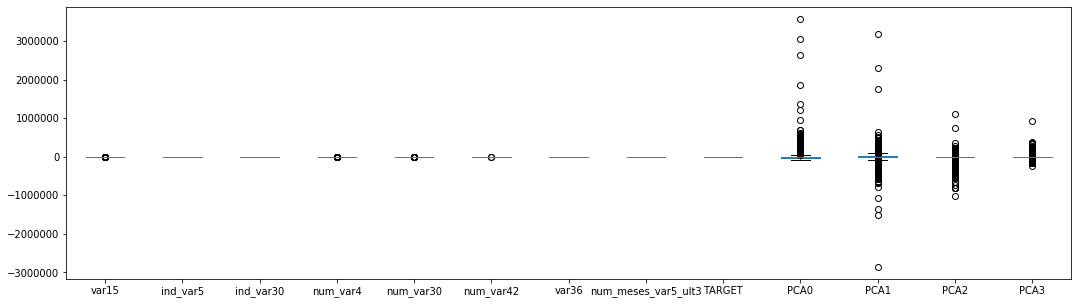

In [12]:
# Making boxplot

train4.boxplot(grid = False, figsize = (18,5))

In [13]:
# Creating a variable to count the number of zeros for each ID

train4["Zeros"] = train4.drop("TARGET", 1).apply(lambda x: sum(x == 0), 1)
test4["Zeros"] = test4.apply(lambda x: sum(x == 0), 1)
    
# Normalizing Data

scaler = MinMaxScaler(feature_range = (0, 1))
train5 = train4.drop(["TARGET"], 1)
train5 = pd.DataFrame(scaler.fit_transform(train5), columns=train5.columns)
train5["TARGET"] = train4.TARGET.values
test4 = pd.DataFrame(scaler.fit_transform(test4), columns=test4.columns)

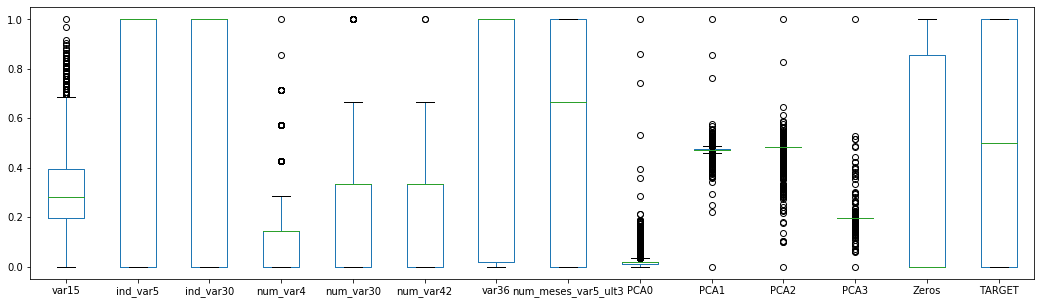

In [14]:
# Making boxplot

train5.boxplot(grid = False, figsize = (18,5))

In [15]:
# Saving data

train5.to_csv("../Dataset/train_1.csv")
test4.to_csv("../Dataset/test_1.csv")